In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from IPython.display import display
from pprint import pprint

In [5]:
# change directory
os.chdir('/Users/syahrulhamdani/Desktop/thesis/predictive-maintenance-of-aircraft-engine/')
print(f'working directory: {os.getcwd()}..')

working directory: /Users/syahrulhamdani/Desktop/thesis/predictive-maintenance-of-aircraft-engine..


In [6]:
trainset = pd.read_csv('./data/processed/processed.csv')
display(trainset.head())
print(trainset.shape)

,EngineID,Cycle,OpSetting1,OpSetting2,OpSetting3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1.0,1.0,-0.001,-0.0,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.419,0.03,392.0,2388.0,100.0,39.06,23.419,191.0
1,1.0,2.0,0.002,-0.0,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.432,0.03,392.0,2388.0,100.0,39.00,23.424,190.0
2,1.0,3.0,-0.004,0.0,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.418,0.03,390.0,2388.0,100.0,38.95,23.344,189.0
3,1.0,4.0,0.001,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.368,0.03,392.0,2388.0,100.0,38.88,23.374,188.0
4,1.0,5.0,-0.002,-0.0,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.429,0.03,393.0,2388.0,100.0,38.90,23.404,187.0


(20631, 27)


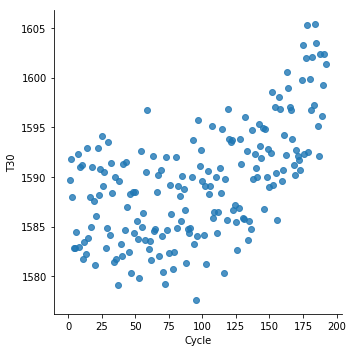

In [7]:
sns.lmplot(x='Cycle', y='T30', data=trainset.loc[trainset['EngineID']==1], fit_reg=False)
plt.show()

In [26]:
def cycle_plot(data, engine_id, col, row=None, saveplot=None):
    """helper function to plot ``col`` and indices (cycle) of certain engine.
    
    parameters
    ----------
    data: Dataset
    engine_id (int): Engine-ID
    col (str): feature name as y-axis
    """
    if saveplot is None:
        filename = col + '-' + str(engine_id) + '_plot.png'
    else:
        filename = saveplot + '.png'
    
    if row is None:
        x = 'Cycle'
    else:
        x = row
        filename 
    dataengine = data.loc[data['EngineID']==engine_id]
    ax = sns.lmplot(x=x, y=col, data=dataengine, fit_reg=False, height=10)
    plt.title(f'Cycle vs {col} in Engine-{engine_id}', pad=0.6)
    plt.show()
    
    return ax
    # plt.savefig(f'./src/visualization/{filename}', format='png')
    # define ax = plt.figure(figsize=10)
    # then return ax -> so that it can be saved in different function
    # in ``save_plot`` function

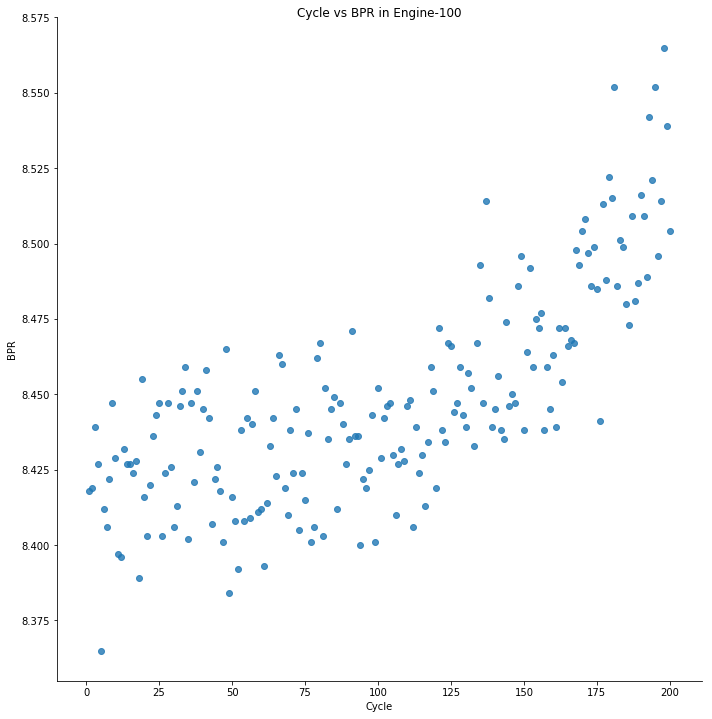

In [28]:
ax = cycle_plot(trainset, 100, 'BPR')

In [51]:
titlefig = ax.ax.title.get_text()
ax.savefig()

'Cycle vs BPR in Engine-100'

In [40]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter